## Ensembled_Techniques Project

#### This project is based on the case study of a telecommunication company, which is facing a customer churn issue. 
#### The project aims at understanding the pattern of the data and predicting customers who are going to churn based on multiple variables to help the company in retaining their existing customers. 
#### The project was accomplished by building a machine learning workflow that will run autonomously with the CSV file and return the best-performing model.

### Part-A

### 1. Data Understanding and Exploration:

In [165]:
# importing useful libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import warnings
warnings.simplefilter('ignore')
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#### 1.A

In [166]:
df1= pd.read_csv("TelcomCustomer-Churn_1.csv")

In [167]:
df1.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [168]:
df1.shape

(7043, 10)

#### 1.B

In [169]:
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [170]:
df2.shape

(7043, 12)

In [171]:
df2.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
OnlineBackup,Yes,No,Yes,No,No
DeviceProtection,No,Yes,No,Yes,No
TechSupport,No,No,No,Yes,No
StreamingTV,No,No,No,No,No
StreamingMovies,No,No,No,No,No
Contract,Month-to-month,One year,Month-to-month,One year,Month-to-month
PaperlessBilling,Yes,No,Yes,No,Yes
PaymentMethod,Electronic check,Mailed check,Mailed check,Bank transfer (automatic),Electronic check
MonthlyCharges,29.85,56.95,53.85,42.3,70.7


#### 1.C

In [172]:
churn = pd.merge(df1, df2, how='outer', on='customerID')

In [173]:
churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [174]:
churn.shape

(7043, 21)

In [175]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [176]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [177]:
list1= list(df1.columns)
list1

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [178]:
list2= list(df2.columns)
list2

['customerID',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [179]:
columns= (list1+list2)
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'customerID',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [180]:
churn_columns= list(churn.columns)
churn_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

#### 1.D:

In [181]:
# verification of all the columns are in merged dataset or not

if set(columns)== set(churn_columns):
    print(" All the Columns are incorporated in new dataframe ")
else:
    print(" Some columns are missing")


 All the Columns are incorporated in new dataframe 


### 2. Data Cleaning and Analysis

#### 2.A:

In [182]:
# checking for any missing values or null values

churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [183]:
# now checking for unexpected values in dataframe
# we check by column wise 
# All the unique values are checked for each feature columns

#### 2.B:

In [184]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [185]:
churn['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [186]:
churn['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [187]:
unwanted= ['customerID','tenure','MonthlyCharges','TotalCharges']

In [188]:
for ele in unwanted:
    churn_columns.remove(ele)
    

In [189]:
churn_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [190]:
for cols in churn_columns:
    
    print("Unique Values for column ", cols, ' is:')
    print(" ")
    print(churn[cols].value_counts(dropna=False))
    print(" ")
    

Unique Values for column  gender  is:
 
Male      3555
Female    3488
Name: gender, dtype: int64
 
Unique Values for column  SeniorCitizen  is:
 
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
 
Unique Values for column  Partner  is:
 
No     3641
Yes    3402
Name: Partner, dtype: int64
 
Unique Values for column  Dependents  is:
 
No     4933
Yes    2110
Name: Dependents, dtype: int64
 
Unique Values for column  PhoneService  is:
 
Yes    6361
No      682
Name: PhoneService, dtype: int64
 
Unique Values for column  MultipleLines  is:
 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
 
Unique Values for column  InternetService  is:
 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
 
Unique Values for column  OnlineSecurity  is:
 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
 
Unique Values for colum

In [191]:
# changing category of columns with continuous values to Float type

churn['tenure']=churn['tenure'].astype("float")

# churn['TotalCharges']= churn['TotalCharges'].astype("float")

In [192]:
# TotalCharges column have unexpected values as it is throwing error while changing to float type

In [193]:
churn['TotalCharges'].value_counts(dropna=False)

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
3822.45     1
2911.5      1
327.45      1
5825.5      1
2282.95     1
Name: TotalCharges, Length: 6531, dtype: int64

In [194]:
# pd.to_numeric(churn['TotalCharges'])
# this is throwing error as unexpected space is there in values

In [195]:
# error in changing 'Totalcharges' column to Float type
# there is missing value in this column
# we impute it by replacing ' ' with np.nan value

In [196]:
churn['TotalCharges'].replace({" ": np.nan}, inplace= True)

In [197]:
pd.to_numeric(churn['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [198]:
# converting column dtype to float

churn['TotalCharges']= churn['TotalCharges'].astype("float")

In [199]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [200]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [201]:
# there are 11 null values in TotalCharges columns

churn[churn['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [202]:
# we change object to category for columns

for feature in churn.columns:
    if churn[feature].dtypes=='object':
        churn[feature]=churn[feature].astype("category")
    else:
        pass

In [203]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

#### 2.C:

In [204]:
def pieplot(data):
    
    for cols in churn_columns:
        
        plt.title(cols)
        plt.pie(churn[cols].value_counts(), labels= churn[cols].unique(), autopct='%.3f%%' )
        plt.show()           

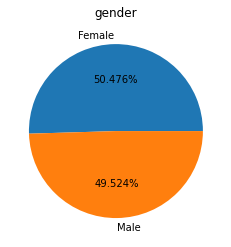

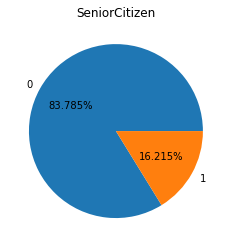

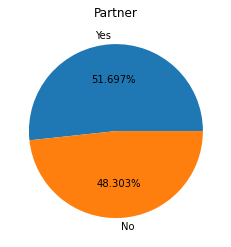

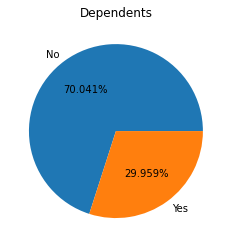

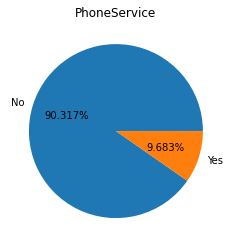

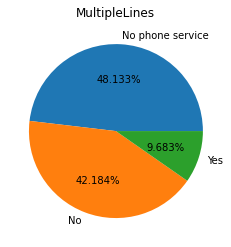

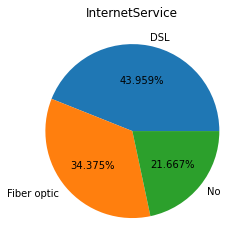

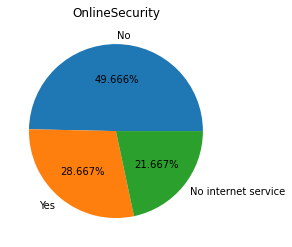

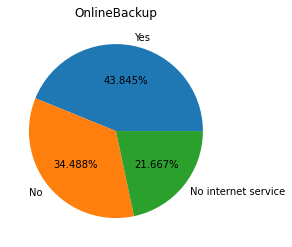

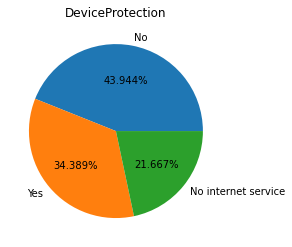

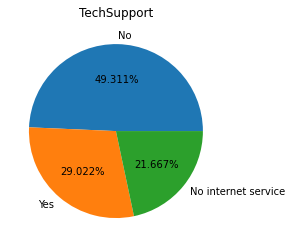

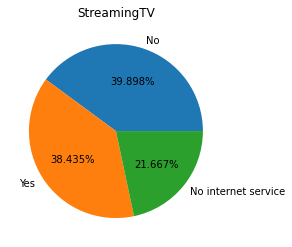

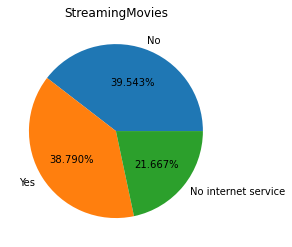

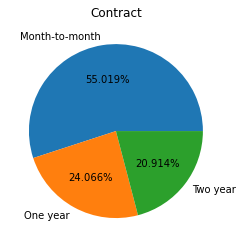

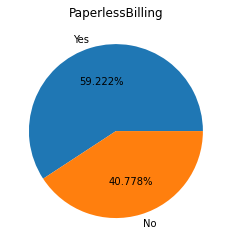

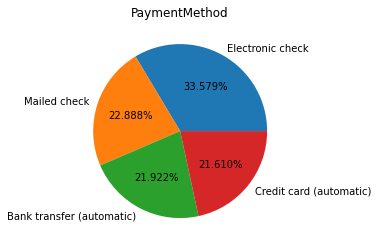

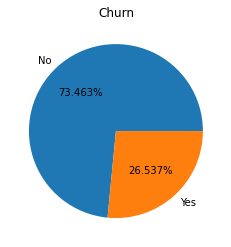

In [205]:
pieplot(churn)

#### 2.D:

#### Ensights:

#### 2.E:  Encoding

In [206]:
churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1.0,34.0,2.0,45.0,2.0
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [207]:
# label encoding is used for those categorical columns 
# which have either yes or no or just 2 definite categories.

from sklearn import preprocessing
label= preprocessing.LabelEncoder()

# we apply this label function to the columns with only 2 type of categories 

columns= ['gender','SeniorCitizen','Partner','Dependents','PhoneService','Contract',
          'PaperlessBilling','Churn']

for column in columns:
        churn[column]= label.fit_transform(churn[column])
        

In [208]:
churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1.0,34.0,2.0,45.0,2.0
PhoneService,0,1,1,0,1
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [209]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   int32   
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int32   
 4   Dependents        7043 non-null   int32   
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   int32   
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   int32   
 16  PaperlessBilling  7043 n

In [210]:
# now we do one hotencoding for those categorical columns which have more than one category

one_hot_columns= ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
          'DeviceProtection', 'TechSupport','StreamingTV',
          'StreamingMovies', 'PaymentMethod']

new_churn= pd.get_dummies(churn, columns=['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
          'DeviceProtection', 'TechSupport','StreamingTV',
          'StreamingMovies', 'PaymentMethod'])

In [211]:
new_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1.0,0,0,1,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34.0,1,1,0,56.95,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2.0,1,0,1,53.85,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45.0,0,1,0,42.30,...,1,0,0,1,0,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2.0,1,0,1,70.70,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24.0,1,1,1,84.80,...,0,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,0,0,1,1,72.0,1,1,1,103.20,...,0,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11.0,0,0,1,29.60,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4.0,1,0,1,74.40,...,1,0,0,1,0,0,0,0,0,1


In [129]:
new_churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1.0,34.0,2.0,45.0,2.0
PhoneService,0,1,1,0,1
Contract,0,1,0,1,0
PaperlessBilling,1,0,1,0,1
MonthlyCharges,29.85,56.95,53.85,42.3,70.7


In [130]:
new_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   category
 1   gender                                   7043 non-null   int32   
 2   SeniorCitizen                            7043 non-null   int64   
 3   Partner                                  7043 non-null   int32   
 4   Dependents                               7043 non-null   int32   
 5   tenure                                   7043 non-null   float64 
 6   PhoneService                             7043 non-null   int32   
 7   Contract                                 7043 non-null   int32   
 8   PaperlessBilling                         7043 non-null   int32   
 9   MonthlyCharges                           7043 non-null   float64 
 10  TotalCharges                        

In [131]:
new_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
Contract,7043.0,0.690473,0.833755,0.00,0.00,0.000,1.0000,2.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.000,1.0000,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [132]:
new_churn[new_churn['TotalCharges'].isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,0,1,0,1,0,1,1,0,1,0,1
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,1,0,1,1,1,1,1,1,1,1,0
Dependents,1,1,1,1,1,1,1,1,1,1,1
tenure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhoneService,0,1,1,1,0,1,1,1,1,1,1
Contract,2,2,2,2,2,2,2,2,1,2,2
PaperlessBilling,1,0,0,0,0,0,0,0,1,0,1
MonthlyCharges,52.55,20.25,80.85,25.75,56.05,19.85,25.35,20.0,19.7,73.35,61.9


In [212]:
# we fill these null values with median as TotalCharges column is numeric type

new_churn['TotalCharges'].fillna(new_churn['TotalCharges'].median(), inplace=True)

In [213]:
# we have dealt with null values 
# now we split data into train and test 

#### 2.F:

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X= new_churn.drop(['Churn', 'customerID'], axis=1)
y= new_churn['Churn']

In [216]:
# splitting data into train & test with 80:20 proportion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2)

In [217]:
X_train.shape

(5634, 38)

In [218]:
y_train.shape

(5634,)

In [219]:
X_test.shape

(1409, 38)

In [220]:
y_test.shape

(1409,)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

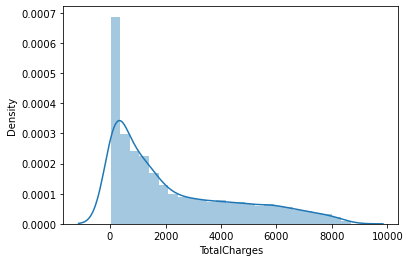

In [221]:
sns.distplot(X['TotalCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

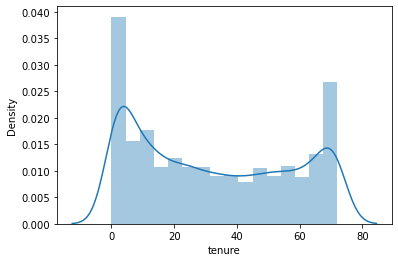

In [222]:
sns.distplot(X['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

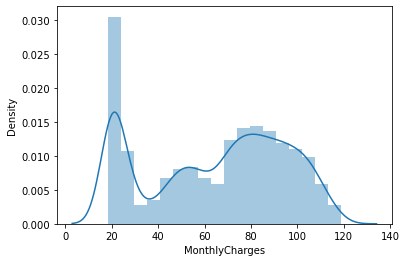

In [223]:
sns.distplot(X['MonthlyCharges'])

#### 2.G:

#### 1. Normalizing/Standardising data with the best approach
#### 2. We are standardising only numerical columns here, as other columns have been encoded
#### 3. Three columns have numerical values tenure, TotalCharges, MonthlyCharges

In [224]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()

In [225]:
X['tenure']= sc.fit_transform(X[['tenure']])
X['TotalCharges']= sc.fit_transform(X[['TotalCharges']])
X['MonthlyCharges']= sc.fit_transform(X[['MonthlyCharges']])

 ### 3. Model Building and Improvement

In [147]:
# first we build model with default values 

In [148]:
xgb= XGBClassifier()

xgb.fit(X_train, y_train)

y_predict= xgb.predict(X_test)
print("------------------------------------------")

print('\nTraining Score is :',xgb.score(X_train, y_train))

print("Testing Score is :",xgb.score(X_test, y_test))

print("\n-------------------------------------------------")

print("\nClassfication Report:\n", metrics.classification_report(y_test, y_predict))


[21:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------------------------------

Training Score is : 0.9433794817181399
Testing Score is : 0.7920511000709723

-------------------------------------------------

Classfication Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1061
           1       0.60      0.49      0.54       348

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.79      1409



In [149]:
# now we find the best hyperparameters for xgbClassifier

In [150]:
from sklearn.model_selection import GridSearchCV, KFold

In [151]:
param = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.05],
    'max_depth': [ 5,10],
    'gamma': [ 0.5, 1 ],
    'reg_alpha': [ 0.5, 1],
    'reg_lambda': [0.5, 1],
    'base_score': [0.2, 0.5]
}

grid = GridSearchCV(XGBClassifier(n_jobs=-1), param, n_jobs=-1, cv=KFold(n_splits=3))
grid.fit(X_train, y_train)

print('Best score:', grid.best_score_)
print('\nBest parameters:', grid.best_params_)

[21:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.7992545260915868

Best parameters: {'base_score': 0.5, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [152]:
# so going with the above parameters :
# Best parameters: {'base_score': 0.5, 'gamma': 0.5, 'learning_rate': 0.05, 
#                  'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1}

### 3.B:

In [153]:
# we build the new model with these parameters

In [154]:
xgb1= XGBClassifier(base_score= 0.5, gamma= 0.5, learning_rate= 0.05,
                    max_depth= 5, n_estimators= 100, reg_alpha= 0.5, reg_lambda= 1)

xgb1.fit(X_train, y_train)

y_predict1= xgb1.predict(X_test)
print("------------------------------------------")

print('\nTraining Score is :',xgb1.score(X_train, y_train))
print("\n-------------------------------------------")

print("Testing Score is :",xgb1.score(X_test, y_test))

print("\n-------------------------------------------------")

print("\nClassfication Report:\n", metrics.classification_report(y_test, y_predict1))

[21:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------------------------------

Training Score is : 0.8288959886403976

-------------------------------------------
Testing Score is : 0.8119233498935415

-------------------------------------------------

Classfication Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1061
           1       0.65      0.51      0.57       348

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### Before hypertuning: 
      Training score  = 0.943
      Testing score = 0.792
      
#### After hypertuning using GridsearchCV:
      
      Training score = 0.828
      Testing Score = 0.811
      

### PART- B

In [338]:

def loaddata():
    df1= pd.read_csv("TelcomCustomer-Churn_1.csv") 
    df2= pd.read_csv("TelcomCustomer-Churn_2.csv") 
    # merging both the datasets
    churn = pd.merge(df1, df2, how='outer', on='customerID') 
    df= churn
    return df 

In [339]:
def dataset(df):
         
    columns= df.columns
    print('Columns names are: ', columns)
    # printing information of dataset
    print("shape of dataframe ", df.shape)
    print('--------------------------------------------')
    print("\n Datatypes of each column is : ", df.dtypes)
    print("------------------------------------------")
    print('\n Information of columns : ', df.info())
    print("----------------------------------------------")
    print('\n Description of numerical columns :', df.describe().T)

In [351]:
    
# encoding the columns with labelencoding or onehotencoding

def encoding(df):
    
    
    
    replace_dict={
                "OnlineBackup":{"No":0,"Yes":1,"No internet service":2},
                "DeviceProtection":{"No":0,"Yes":1,"No internet service":2},
                "TechSupport":{"No":0,"Yes":1,"No internet service":2},
                "StreamingTV":{"No":0,"Yes":1,"No internet service":2},
                "StreamingMovies":{"No":0,"Yes":1,"No internet service":2},
                "PaperlessBilling":{"No":0,"Yes":1},
                "Churn":{"No":0,"Yes":1},
                "gender":{"Male":0,"Female":1},
                "Partner":{"No":0,"Yes":1},
                "Dependents":{"No":0,"Yes":1},
                "PhoneService":{"No":0,"Yes":1},
                "MultipleLines":{"No":0,"Yes":1,"No phone service":2},
                "OnlineSecurity":{"No":0,"Yes":1,"No internet service":2}
    }



    onehotencode_col=['Contract','PaymentMethod','InternetService']
    
    ndf=df.replace(replace_dict)
    new_df=pd.get_dummies(ndf, columns=onehotencode_col, drop_first=True)
    print("\n new churn shape:",new_df.shape)
    
    return new_df 
    
            

In [359]:
def preprocessing(df):
    
    # checking for duplicates in dataset
    
    if df.duplicated().sum()!= 0:
            df.drop_duplicates()
    else:
            print ('\n No duplicates found')
    
    # checking all continuous values has float values or not
    
    if df['MonthlyCharges'].dtype=='float':
        print('\nMonthlyCharges has datatype float\n')

    else:
        print('\nMonthlyCharges has not datatype float\n')


    
    if df['TotalCharges'].dtype=='float':
        print('\nTotalCharges has datatype float')

    else:
        print('\nTotalCharges has not datatype float\n Datatype:',df['TotalCharges'].dtype)
        
    
    # TotalCharges has not datatype, so convert it into float
    
    df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors = 'coerce')
    
    # we fill these null values with median as TotalCharges column is numeric type

    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


    if df['TotalCharges'].dtype=='float':
        print('\nTotalCharges has datatype float')

    else:
        print('\nTotalCharges has not datatype float\n Datatype:',df['TotalCharges'].dtype)
   
    
    

In [361]:
            
def main():
    
    telchurn = loaddata()
   
    dataset(telchurn)
    
    preprocessing(telchurn)
    
    
    new_df = encoding(telchurn)
    
    
    
    x1= new_df.drop(['Churn','customerID'], axis=1)   
    y1= new_df['Churn']
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20,random_state=1)
    print('\nShape of X_train data is: ', x1_train.shape)
    
    print(" \nShape of X_test data is: ", x1_test.shape)
    print("------------------------------------------------")
# creating KNN, Logistic regression and SVM models
                   
    knn= KNeighborsClassifier(n_neighbors=5)            
    knn.fit(x1_train, y1_train)
    knn_trainscore=knn.score(x1_train,y1_train)
    knn_testscore=knn.score(x1_test,y1_test)
        
    print("\nTraining Accuracy of KNN is: ", knn_trainscore )
      
    print("\nTesting Accuracy OF KNN is: ", knn_testscore )
    print("\n-------------------------------------------- ")
                    
# logistic regression model

    lr= LogisticRegression()
    lr.fit(x1_train, y1_train)
    
    lr_trainscore=lr.score(x1_train,y1_train)
    lr_testscore=lr.score(x1_test,y1_test)

    print("\nTraining Accuracy of Logistic Model is: ")
    print(lr.score(x1_train,y1_train))
    
    print("\nThe Testing Accuracy of Logistic Model is: ")
    print(lr.score(x1_test,y1_test))
    print("\n ---------------------------------------------------- ")
    
# SVM model 
    
    clf = svm.SVC(gamma=0.025, C=3) 
    clf.fit(x1_train , y1_train)
    y_pred = clf.predict(x1_test)
    svm_testscore=accuracy_score(y1_test , y_pred)
    
    print('SVM model : ')
    print("\nSVM accuracy score for testing data is : ",accuracy_score(y1_test , y_pred) )
    

 # we compare testing accuracy score for comparing various models
    
    a= knn.score(x1_test,y1_test)
    b= lr.score(x1_test,y1_test)
    c= accuracy_score(y1_test , y_pred)
    
    if (a>b>c):
        print(" \n KNN model is best ")
    elif (b>c>a):
        print("\n Logistic regression model is best")
    else:
        print(" \n SVM model is best built model")
    
main()

Columns names are:  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
shape of dataframe  (7043, 21)
--------------------------------------------

 Datatypes of each column is :  customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod 